In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traffic-data/test.p
/kaggle/input/traffic-data/train.p
/kaggle/input/traffic-data/signnames.csv
/kaggle/input/traffic-data/valid.p


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
#from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import pickle
import pandas as pd
import random
import cv2
  
np.random.seed(0)

In [3]:

# Read data
data = pd.read_csv("../input/traffic-data/signnames.csv")
  
with open('../input/traffic-data/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('../input/traffic-data/valid.p', 'rb') as f:
    val_data = pickle.load(f)
with open('../input/traffic-data/test.p', 'rb') as f:
    test_data = pickle.load(f)
  
# Extracting the labels from the dictionaries
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
  
# Printing the shapes
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [4]:

def preprocessing(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img / 255
    return img
  
X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))
  
X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

In [5]:
datagen = ImageDataGenerator(width_shift_range = 0.1, 
                  height_shift_range = 0.1, 
                  zoom_range = 0.2, 
                  shear_range = 0.1, 
                  rotation_range = 10)
datagen.fit(X_train)
  
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

In [6]:
from tensorflow.keras.optimizers import Adam

In [7]:

num_classes = 43
  
def cnn_model():
    model = Sequential()
    model.add(Conv2D(60, (5, 5), 
                     input_shape =(32, 32, 1), 
                     activation ='relu'))
      
    model.add(Conv2D(60, (5, 5), activation ='relu'))
    model.add(MaxPooling2D(pool_size =(2, 2)))
      
    model.add(Conv2D(30, (3, 3), activation ='relu'))
    model.add(Conv2D(30, (3, 3), activation ='relu'))
    model.add(MaxPooling2D(pool_size =(2, 2)))
      
    model.add(Flatten())
    model.add(Dense(500, activation ='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation ='softmax'))
      
    # Compile model
    model.compile(Adam(lr = 0.001), 
                  loss ='categorical_crossentropy', 
                  metrics =['accuracy'])
    return model
  
model = cnn_model()
history = model.fit_generator(datagen.flow(X_train, y_train, 
                            batch_size = 50), steps_per_epoch = 200, 
                            epochs = 50, validation_data =(X_val, y_val), 
                            shuffle = 1)

2022-09-18 16:11:42.835740: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-18 16:11:42.927591: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-18 16:11:42.928355: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-18 16:11:42.930129: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/50


2022-09-18 16:11:47.305353: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


200/200 [==============================] - 11s 19ms/step - loss: 3.1199 - accuracy: 0.1664 - val_loss: 1.8008 - val_accuracy: 0.4998
Epoch 2/50
200/200 [==============================] - 4s 20ms/step - loss: 1.6969 - accuracy: 0.5016 - val_loss: 0.6541 - val_accuracy: 0.7982
Epoch 3/50
200/200 [==============================] - 4s 17ms/step - loss: 1.1273 - accuracy: 0.6558 - val_loss: 0.3643 - val_accuracy: 0.8959
Epoch 4/50
200/200 [==============================] - 3s 17ms/step - loss: 0.8527 - accuracy: 0.7353 - val_loss: 0.3774 - val_accuracy: 0.8635
Epoch 5/50
200/200 [==============================] - 4s 19ms/step - loss: 0.7299 - accuracy: 0.7771 - val_loss: 0.2502 - val_accuracy: 0.9247
Epoch 6/50
200/200 [==============================] - 3s 17ms/step - loss: 0.5884 - accuracy: 0.8127 - val_loss: 0.1995 - val_accuracy: 0.9304
Epoch 7/50
200/200 [==============================] - 4s 18ms/step - loss: 0.5372 - accuracy: 0.8400 - val_loss: 0.1452 - val_accuracy: 0.9569
Epoch 8/5

Text(0.5, 0, 'epoch')

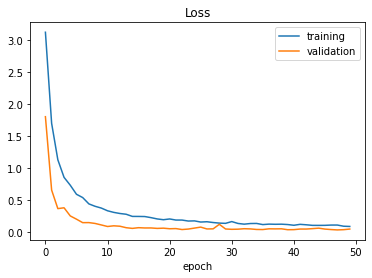

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

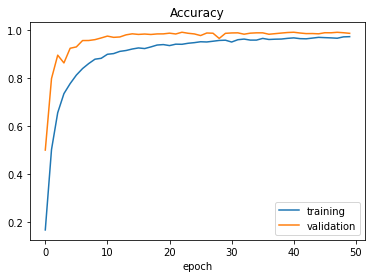

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [10]:

score = model.evaluate(X_test, y_test, verbose = 0)
print('Test Loss: ', score[0])
print('Test Accuracy: ', score[1])

Test Loss:  0.12648241221904755
Test Accuracy:  0.9719715118408203


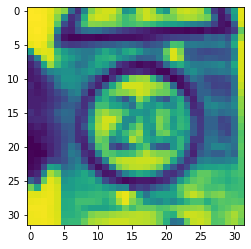

In [18]:

plt.imshow(X_test[990].reshape(32, 32))
py_predict = np.argmax( model.predict(X_test[990].reshape(1, 32, 32, 1)))